### Visualisation of missing values and low regime intervals

The problem of **low regime intervals** and **missing values** here is very close since missing values are very often encountered in these **"cycles"**.

From this visualization we understand that taking all the sensors missing values into account would be very problematic since we would lose a lot of information.

In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import mpld3
from observation import Observation
from constants import *
from datetime import timedelta
from tools import sequence_to_interval
from interval import Interval
plt.style.use('ggplot')
mpld3.enable_notebook()

reactor_site = "B1" #[site+tranche for site in ["A","B","C","D","E","F","G","H"] for tranche in ["1","2"]] + ["B3","B4","F3","F4"]

suffixes = [
"DEB1-1"#,"DEB1-2"#,"DEB1-3","DEB1-4", # Débit de fuite au joint 1 (Gamme Large)
] 

PATH = "../../Data/GMPP_IRSDI/"
obs = Observation(PATH,reactor_site,suffixes,verbose=1,ignore_keys=deb2)

print(str(len(obs.df))+" : Initial length of full df")
print(str(len(obs.full_concatenated_df))+" : New length of all selected intervals")

Loading in memory 1 observations...
Concatenation...
Changing isolated wrong values...
Forward Filling...
Backward Filling...
525887 : Initial length of full df
504471 : New length of all selected intervals


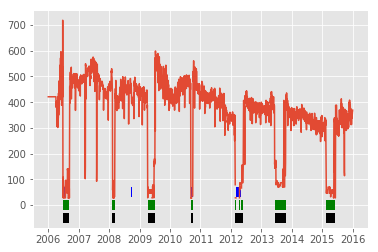

In [8]:
fig, axe = plt.subplots()

from datetime import timedelta
from tools import sequence_to_interval, lazyprop
from interval import Interval
from constants import *

time_precision = '1D'
low_regime_merge_time = timedelta(days=15) # In days: The merging time for low regime
margin_intervals_to_remove = timedelta(days=1) # In days: Be careful, a high time_precision can make this wrong !
filter_spike = timedelta(hours=1) # In days: below that, the interval is considered as a spike !
subsample = obs.full_concatenated_df[deb1[0]]#.resample(time_precision, label='right').min()
subsample2 = subsample.resample(time_precision, label='right').min()
###
obs.intervals_to_remove.plot(y_pos=50,lw=10, axe = axe,color="b")
###

low_regime = sequence_to_interval(subsample.index[(subsample < 200)], low_regime_merge_time)
low_regime = Interval(low_regime)

###
low_regime.plot(y_pos=1,lw=10, axe = axe,color="g")
###

low_regime.update_conditionally(obs.intervals_to_remove.enlarge(margin_intervals_to_remove))
low_regime.filter(filter_spike)

###
low_regime.plot(y_pos=-50,lw=10, axe = axe)
###

axe.plot(subsample2.index,subsample2.values) #subsample.plot(ax = axe)


In [ ]:
obs.full_concatenated_df[(obs.full_concatenated_df.max() == obs.full_concatenated_df).any(axis=1)]

In [ ]:
obs.df["2015-11-18 8:00:00":"2015-11-18 18:00:00"]
#obs.df["2015-11-19 9:00:00":"2015-11-19 10:10:00"]

In [ ]:
obs.df.max()

In [ ]:
column = deb1[0]
bad_labels = obs.df.index[((obs.df[column] == obs.df[column].max()) | (obs.df[column] == 0))]

In [ ]:
bad_labels

In [ ]:
bad_intervals = sequence_to_interval(bad_labels, timedelta(minutes=10))

In [ ]:
bad_intervals

In [ ]:
bad_labels[-20:]